# LINEAR REGRESSION OBTAINED BY VANILLA GRADIENT DESCENT

In this little notebook we implement linear regression not using the closed solution but using some vanilla gradient descent technique. This want to be an exercise!

In [114]:
import numpy as np
from matplotlib import pyplot as plt
import random

We define the linear function as follow

In [115]:
def linear_function(b, w, x):
    return b+w*x

In [116]:
N = 1000
b = 100
w = -2
x = np.linspace(0, 10, N)
y = linear_function(b, w, x) + np.random.normal(0, 1, N)

Now we remember the different derivative of $b$ and $w$ respectively:

$$ \frac{df}{db} = \frac{\sum{-2y_i + 2b + 2wx_i}}{N} $$

$$ \frac{df}{dw} = \frac{\sum{-2y_ix_i + 2bx_i^2 + 2wx_i}}{N} $$

In [117]:
def linear_gradient(b, w, x, y, N):   
    db = (2/N)*np.sum(-y + b + w*x)
    dw = (2/N)*np.sum(-y*x + w*x*x+ b*x)
    return db, dw

We remember how we update the weights there: 

$$ w_{new} = w_{old} - \gamma\frac{df}{dw} $$

where $\gamma$ is the learning rate

In [118]:
verbose = False
def gradient_descent_iteration(x, y, N, learning_rate = 0.1, iteration = 1000):
    b = random.gauss(0, 1)
    w = random.gauss(0, 1)
    e = [np.linalg.norm(y-x*w-b, 2)/N]
    for _ in range (iteration):
        db, dw = linear_gradient(b, w, x, y, N)
        if verbose:
            print(f"{b} + {w}x")
            print(f"db : {db} \ndw : {dw}")
        b = b - learning_rate*db
        w = w - learning_rate*dw
        error = np.linalg.norm(y-x*w-b, 2)/N
        e.append(error) 
    return b, w, e

In [119]:
iterazioni = 10000
b_point, w_point, errors = gradient_descent_iteration(x, y, N, learning_rate=0.001, iteration=iterazioni)

We plot the results

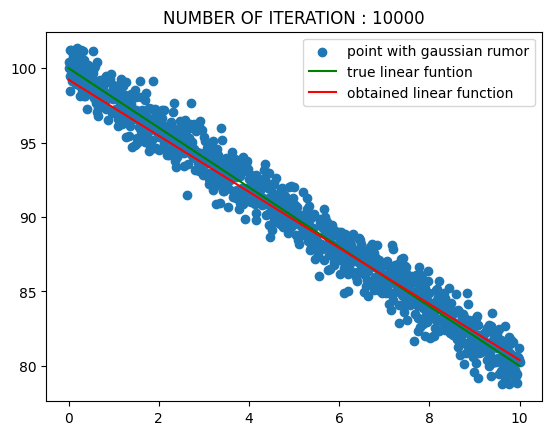

In [120]:
plt.title(f"NUMBER OF ITERATION : {iterazioni}")
plt.scatter(x, y, label='point with gaussian rumor')
plt.plot(x, b + w*x, 'g', label='true linear funtion')
plt.plot(x, b_point + w_point*x, 'r', label='obtained linear function')
plt.legend()

And in the end the error

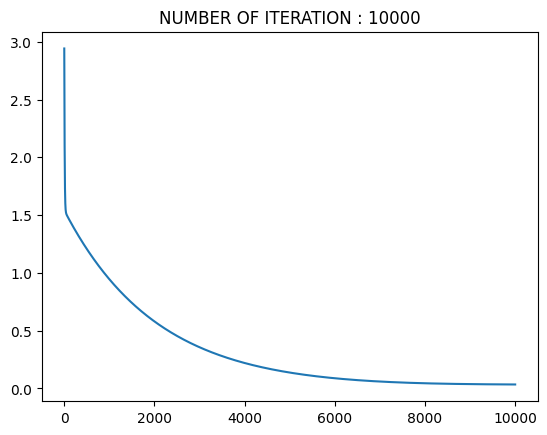

In [121]:
plt.title(f"NUMBER OF ITERATION : {iterazioni}")
plt.plot(errors)